In [1]:
# Kullanılan kütüphanelerin sürümünü kontrol et
import numpy, sklearn, xgboost
print("NumPy Version:", numpy.__version__)
print("scikit-learn Version:", sklearn.__version__)
print("XGBoost Version:", xgboost.__version__)


NumPy Version: 1.24.3
scikit-learn Version: 1.3.0
XGBoost Version: 2.0.2


In [2]:
import pandas as pd

# Sonuçları kaydetmek için bir liste oluştur
results_list = []

# Listeyi DataFrame'e dönüştürme
results = pd.DataFrame(results_list)

# Tüm sonuçları bir Excel dosyasına kaydetme
results.to_excel('kabuller_dahil_tüm_veriler_son.xlsx', index=False)

# Sonuçları yazdırma
print(results)


Empty DataFrame
Columns: []
Index: []


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, make_scorer

# Performans metriklerini hesaplama fonksiyonu
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    return r2, rmse, mae, mape

# IQR yöntemi ile outlier tespiti ve temizleme fonksiyonu
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    is_not_outlier = ~((df[columns] < (Q1 - 1.5 * IQR)) |(df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[is_not_outlier]


In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

# Kütüphaneleri çağır
import pandas as pd
from sklearn.model_selection import train_test_split

# Veri dosyasını yükle
file_path = "G:\\Drive'ım\\AKADEMİK\\DOKTORA\\Doktora Tez Modeller\\ML çalışmaları\\ngpc_final2.xlsx"
df = pd.read_excel(file_path,
                sheet_name ="final")

# Bağımsız değişkenleri belirle
independent_variables = ['diameter', 
                         'length', 
                         'line_valve', 
                         'take_off_valve', 
                         'pigging_station']

X = df[independent_variables]
y = df['adj_cost']

# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

pd.options.display.float_format = "{:,.2f}".format

# X_test ve y_test'i birleştir
test_data = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Excel dosyasına kaydetme
output_file_path = "G:\\Drive'ım\\AKADEMİK\\DOKTORA\\Doktora Tez Modeller\\ML çalışmaları\\X_test_y_test_output.xlsx"
test_data.to_excel(output_file_path, index=False)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(90, 5) (23, 5) (90,) (23,)


In [5]:
X_test, y_test

(     diameter  length  line_valve  take_off_valve  pigging_station
 80      48.00   69.59           3               0                0
 4       36.00  239.55          13               5                5
 40      10.00  121.09           4               5                2
 69       8.00   28.16           0               1                2
 10      36.00   63.00           2               2                1
 45       8.00   44.52           1               1                2
 70      10.00   48.95           1               1                2
 66       8.00   31.98           0               1                2
 47       8.00   58.65           1               1                2
 11       6.00   31.00           1               2                1
 98       8.00   12.98           0               1                2
 36      20.00  156.85           5               4                2
 83      20.00  126.18           4               0                2
 111     12.00   61.40           1              

In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
diameter,113.00,19.71,6.00,8.00,13.23,31.64,48.00,13.92
length,113.00,92.32,5.60,35.49,62.95,120.02,501.00,84.18
line_valve,113.00,2.83,0.00,1.00,2.00,4.00,19.00,3.37
take_off_valve,113.00,1.92,0.00,1.00,1.00,2.00,16.00,2.30
pigging_station,113.00,2.23,0.00,1.00,2.00,2.00,8.00,1.36
begg_time,113,2014-10-02 22:43:32.389380608,1997-04-29 00:00:00,2009-10-30 00:00:00,2017-03-23 00:00:00,2020-07-29 00:00:00,2024-07-12 00:00:00,NaN
cost_$,113.00,"16,110,525.45","129,526.58","2,105,776.07","5,825,033.61","11,953,470.54","339,750,000.00","40,877,249.48"
CPI_begg,113.00,240.92,159.90,217.35,244.19,259.37,313.53,39.63
adj_cost,113.00,"36,657,740.00","380,474.64","4,413,094.87","12,871,542.71","32,792,565.42","636,853,343.81","79,141,824.86"
cost?,47.00,"29,486,798.33","743,843.78","1,901,335.58","4,991,577.54","19,118,676.00","307,263,433.00","60,816,921.95"


# Parametre Gridleri

In [7]:
# Parametre Gridleri

# ElasticNet
elasticnet_params = {    'alpha': [0.01, 0.1, 1, 10, 100,1000],
                         'l1_ratio': [ 0.1, 0.5, 0.7, 0.9]      }

# KNN
knn_params = {    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11],
                  'weights': ['uniform', 'distance']   }

# Random Forest
rf_params = {
    'n_estimators': [10, 50, 100],       # Daha küçük ağaç sayısı aralığı
    'max_features': ['sqrt'],            # max_features doğrudan sqrt olacak
    'min_samples_split': [5, 10],        # Daha büyük bölünme sayısı ile daha genel model
    'min_samples_leaf': [2, 4]           # Daha büyük yaprak sayısı seçenekleri
}
    
# XGBoost
xgb_params = {
    'n_estimators': [10, 50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.85, 1.0],
    'colsample_bytree': [0.7, 0.85, 1.0]
}

# ÇDR

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict

# Çoklu doğrusal regresyon modeli
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Tahmin yapma
y_train_pred_BT = linear_regression.predict(X_train)
y_test_pred_BT = linear_regression.predict(X_test)

# Performans metrikleri (BT)
r2_train_BT, rmse_train_BT, mae_train_BT, mape_train_BT = calculate_metrics(y_train, y_train_pred_BT)
r2_test_BT, rmse_test_BT, mae_test_BT, mape_test_BT = calculate_metrics(y_test, y_test_pred_BT)


# 5 katlı çapraz doğrulama (AT - After Tuning)
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Çapraz doğrulama R² skorları (AT) Train
cross_val_r2_scores_train = cross_val_score(linear_regression, X_train, y_train, cv=cv, scoring='r2')

# Çapraz doğrulama RMSE skorları (AT) Train
cross_val_rmse_scores_train = cross_val_score(linear_regression, X_train, y_train, cv=cv, 
                                        scoring=make_scorer(mean_squared_error, squared=False))

# Çapraz doğrulama MAE skorları (AT) Train
cross_val_mae_scores_train = cross_val_score(linear_regression, X_train, y_train, cv=cv, 
                                       scoring=make_scorer(mean_absolute_error))

# Çapraz doğrulama MAPE hesaplama (AT) Train
y_train_pred_cv = cross_val_predict(linear_regression, X_train, y_train, cv=cv)
cross_val_mape_scores_train = np.mean(np.abs((y_train - y_train_pred_cv) / y_train)) * 100

# Ortalama skorları hesaplama (AT) Train
r2_train_AT = cross_val_r2_scores_train.mean()
rmse_train_AT = cross_val_rmse_scores_train.mean()
mae_train_AT = cross_val_mae_scores_train.mean()
mape_train_AT = cross_val_mape_scores_train


# Sonuçları yazdırma
results_çdr = {
    'Model': 'ÇDR',
    'R2_train_BT': r2_train_BT,
    'RMSE_train_BT': rmse_train_BT,
    'MAE_train_BT': mae_train_BT,
    'MAPE_train_BT': mape_train_BT,
    'R2_test_BT': r2_test_BT,
    'RMSE_test_BT': rmse_test_BT,
    'MAE_test_BT': mae_test_BT,
    'MAPE_test_BT': mape_test_BT,
    'R2_train_AT': r2_train_AT,
    'RMSE_train_AT': rmse_train_AT,
    'MAE_train_AT': mae_train_AT,
    'MAPE_train_AT': mape_train_AT

}

# Formatlı yazdırma
for key, value in results_çdr.items():
    if key == 'Model':
        print(f"{key}: {value}")
    else:
        print(f"{key}: {value:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))

# Sonuçları listeye ekleme
results_list.append(results_çdr)

# Tüm sonuçları DataFrame'e dönüştürme ve kaydetme
results= pd.DataFrame(results_list)
results.to_excel("kabuller_dahil_tüm_veriler_son.xlsx", index=False)

results


Model: ÇDR
R2_train_BT: 0,75
RMSE_train_BT: 40.091.313,32
MAE_train_BT: 24.707.889,55
MAPE_train_BT: 373,39
R2_test_BT: 0,61
RMSE_test_BT: 43.370.642,30
MAE_test_BT: 30.486.681,79
MAPE_test_BT: 335,94
R2_train_AT: 0,08
RMSE_train_AT: 45.440.348,03
MAE_train_AT: 29.079.374,63
MAPE_train_AT: 391,92


,Model,R2_train_BT,RMSE_train_BT,MAE_train_BT,MAPE_train_BT,R2_test_BT,RMSE_test_BT,MAE_test_BT,MAPE_test_BT,R2_train_AT,RMSE_train_AT,MAE_train_AT,MAPE_train_AT
0,ÇDR,0.75,"40,091,313.32","24,707,889.55",373.39,0.61,"43,370,642.30","30,486,681.79",335.94,0.08,"45,440,348.03","29,079,374.63",391.92


# ElasticNet

In [9]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV



# ElasticNet modeli (Tune Öncesi)
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)

# Tune öncesi tahmin yap
y_train_pred_BT = elasticnet.predict(X_train)
y_test_pred_BT = elasticnet.predict(X_test)

# Performans metriklerini hesaplama (daha önce tanımlanmış calculate_metrics fonksiyonunu kullanarak)
r2_train_BT, rmse_train_BT, mae_train_BT, mape_train_BT = calculate_metrics(y_train, y_train_pred_BT)
r2_test_BT, rmse_test_BT, mae_test_BT, mape_test_BT = calculate_metrics(y_test, y_test_pred_BT)

# GridSearchCV ile ElasticNet modeli için en iyi hiperparametreleri bulma
elasticnet_grid = GridSearchCV(ElasticNet(), elasticnet_params, cv=5, scoring='r2')
elasticnet_grid.fit(X_train, y_train)

# En iyi parametreler ile ElasticNet modelini eğitme
best_elasticnet = elasticnet_grid.best_estimator_

# Modeli eğit
best_elasticnet.fit(X_train, y_train)

# Tune sonrası tahmin yap
y_train_pred_AT = best_elasticnet.predict(X_train)
y_test_pred_AT = best_elasticnet.predict(X_test)

# Performans metrikleri (AT: After Tuning)
r2_train_AT, rmse_train_AT, mae_train_AT, mape_train_AT = calculate_metrics(y_train, y_train_pred_AT)
r2_test_AT, rmse_test_AT, mae_test_AT, mape_test_AT = calculate_metrics(y_test, y_test_pred_AT)

# Sonuçları yazdırma
results_elasticnet = {
    'Model': 'ElasticNet',
    'R2_train_BT': r2_train_BT,
    'RMSE_train_BT': rmse_train_BT,
    'MAE_train_BT': mae_train_BT,
    'MAPE_train_BT': mape_train_BT,
    'R2_test_BT': r2_test_BT,
    'RMSE_test_BT': rmse_test_BT,
    'MAE_test_BT': mae_test_BT,
    'MAPE_test_BT': mape_test_BT,
    'R2_train_AT': r2_train_AT,
    'RMSE_train_AT': rmse_train_AT,
    'MAE_train_AT': mae_train_AT,
    'MAPE_train_AT': mape_train_AT,
    'R2_test_AT': r2_test_AT,
    'RMSE_test_AT': rmse_test_AT,
    'MAE_test_AT': mae_test_AT,
    'MAPE_test_AT': mape_test_AT
}

# Formatlı yazdırma
for key, value in results_elasticnet.items():
    if key == 'Model':
        print(f"{key}: {value}")
    else:
        print(f"{key}: {value:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))


Model: ElasticNet
R2_train_BT: 0,75
RMSE_train_BT: 40.357.198,26
MAE_train_BT: 24.695.554,81
MAPE_train_BT: 386,39
R2_test_BT: 0,68
RMSE_test_BT: 39.140.127,36
MAE_test_BT: 27.910.032,49
MAPE_test_BT: 327,96
R2_train_AT: 0,71
RMSE_train_AT: 43.448.801,92
MAE_train_AT: 26.931.265,38
MAPE_train_AT: 434,40
R2_test_AT: 0,74
RMSE_test_AT: 35.228.240,74
MAE_test_AT: 23.334.860,30
MAPE_test_AT: 314,74


In [10]:
# Sonuçları listeye ekleme
results_list.append(results_elasticnet)

results= pd.DataFrame(results_list).T

results.to_excel("kabuller_dahil_tüm_veriler_son.xlsx")

results

,0,1
Model,ÇDR,ElasticNet
R2_train_BT,0.75,0.75
RMSE_train_BT,"40,091,313.32","40,357,198.26"
MAE_train_BT,"24,707,889.55","24,695,554.81"
MAPE_train_BT,373.39,386.39
R2_test_BT,0.61,0.68
RMSE_test_BT,"43,370,642.30","39,140,127.36"
MAE_test_BT,"30,486,681.79","27,910,032.49"
MAPE_test_BT,335.94,327.96
R2_train_AT,0.08,0.71


# KNN

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# KNN modeli (Tune Öncesi)
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# Tune öncesi tahmin yap
y_train_pred_BT = knn.predict(X_train)
y_test_pred_BT = knn.predict(X_test)

# Performans metriklerini hesaplama
r2_train_BT, rmse_train_BT, mae_train_BT, mape_train_BT = calculate_metrics(y_train, y_train_pred_BT)
r2_test_BT, rmse_test_BT, mae_test_BT, mape_test_BT = calculate_metrics(y_test, y_test_pred_BT)

# GridSearchCV ile KNN modeli için en iyi hiperparametreleri bulma
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='r2')
knn_grid.fit(X_train, y_train)

# En iyi parametreler ile KNN modelini eğitme
best_knn = knn_grid.best_estimator_

# Modeli eğit
best_knn.fit(X_train, y_train)

# Tune sonrası tahmin yap
y_train_pred_AT = best_knn.predict(X_train)
y_test_pred_AT = best_knn.predict(X_test)

# Performans metrikleri (AT: After Tuning)
r2_train_AT, rmse_train_AT, mae_train_AT, mape_train_AT = calculate_metrics(y_train, y_train_pred_AT)
r2_test_AT, rmse_test_AT, mae_test_AT, mape_test_AT = calculate_metrics(y_test, y_test_pred_AT)

# KNN model sonuçlarını saklama
results_knn = {
    'Model': 'KNN',
    'R2_train_BT': r2_train_BT,
    'RMSE_train_BT': rmse_train_BT,
    'MAE_train_BT': mae_train_BT,
    'MAPE_train_BT': mape_train_BT,
    'R2_test_BT': r2_test_BT,
    'RMSE_test_BT': rmse_test_BT,
    'MAE_test_BT': mae_test_BT,
    'MAPE_test_BT': mape_test_BT,
    'R2_train_AT': r2_train_AT,
    'RMSE_train_AT': rmse_train_AT,
    'MAE_train_AT': mae_train_AT,
    'MAPE_train_AT': mape_train_AT,
    'R2_test_AT': r2_test_AT,
    'RMSE_test_AT': rmse_test_AT,
    'MAE_test_AT': mae_test_AT,
    'MAPE_test_AT': mape_test_AT
}

knn_mape = mape_test_AT  # After Tuning için MAPE değerini ata

# Formatlı yazdırma
for key, value in results_knn.items():
    if key == 'Model':
        print(f"{key}: {value}")
    else:
        print(f"{key}: {value:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))

# Sonuçları listeye ekleme
results_list.append(results_knn)

results = pd.DataFrame(results_list).T
results.to_excel("kabuller_dahil_tüm_veriler_son.xlsx")

results


Model: KNN
R2_train_BT: 0,73
RMSE_train_BT: 42.406.643,71
MAE_train_BT: 12.579.906,46
MAPE_train_BT: 28,89
R2_test_BT: 0,83
RMSE_test_BT: 28.282.580,27
MAE_test_BT: 11.227.757,01
MAPE_test_BT: 29,51
R2_train_AT: 1,00
RMSE_train_AT: 0,00
MAE_train_AT: 0,00
MAPE_train_AT: 0,00
R2_test_AT: 0,82
RMSE_test_AT: 29.218.117,97
MAE_test_AT: 9.967.553,86
MAPE_test_AT: 23,65


,0,1,2
Model,ÇDR,ElasticNet,KNN
R2_train_BT,0.75,0.75,0.73
RMSE_train_BT,"40,091,313.32","40,357,198.26","42,406,643.71"
MAE_train_BT,"24,707,889.55","24,695,554.81","12,579,906.46"
MAPE_train_BT,373.39,386.39,28.89
R2_test_BT,0.61,0.68,0.83
RMSE_test_BT,"43,370,642.30","39,140,127.36","28,282,580.27"
MAE_test_BT,"30,486,681.79","27,910,032.49","11,227,757.01"
MAPE_test_BT,335.94,327.96,29.51
R2_train_AT,0.08,0.71,1.00


# RF

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest modeli (Tune Öncesi)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Tune öncesi tahmin yap
y_train_pred_BT = rf.predict(X_train)
y_test_pred_BT = rf.predict(X_test)

# Performans metriklerini hesaplama
r2_train_BT, rmse_train_BT, mae_train_BT, mape_train_BT = calculate_metrics(y_train, y_train_pred_BT)
r2_test_BT, rmse_test_BT, mae_test_BT, mape_test_BT = calculate_metrics(y_test, y_test_pred_BT)

# GridSearchCV ile Random Forest modeli için en iyi hiperparametreleri bulma
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)

# En iyi parametreler ile Random Forest modelini eğitme
best_rf = rf_grid.best_estimator_

# Modeli eğit
best_rf.fit(X_train, y_train)

# Tune sonrası tahmin yap
y_train_pred_AT = best_rf.predict(X_train)
y_test_pred_AT = best_rf.predict(X_test)

# Performans metrikleri (AT: After Tuning)
r2_train_AT, rmse_train_AT, mae_train_AT, mape_train_AT = calculate_metrics(y_train, y_train_pred_AT)
r2_test_AT, rmse_test_AT, mae_test_AT, mape_test_AT = calculate_metrics(y_test, y_test_pred_AT)

# Sonuçları yazdırma
results_rf = {
    'Model': 'Random Forest',
    'R2_train_BT': r2_train_BT,
    'RMSE_train_BT': rmse_train_BT,
    'MAE_train_BT': mae_train_BT,
    'MAPE_train_BT': mape_train_BT,
    'R2_test_BT': r2_test_BT,
    'RMSE_test_BT': rmse_test_BT,
    'MAE_test_BT': mae_test_BT,
    'MAPE_test_BT': mape_test_BT,
    'R2_train_AT': r2_train_AT,
    'RMSE_train_AT': rmse_train_AT,
    'MAE_train_AT': mae_train_AT,
    'MAPE_train_AT': mape_train_AT,
    'R2_test_AT': r2_test_AT,
    'RMSE_test_AT': rmse_test_AT,
    'MAE_test_AT': mae_test_AT,
    'MAPE_test_AT': mape_test_AT
}

rf_mape = mape_test_AT  # After Tuning için MAPE değerini ata

# Formatlı yazdırma
for key, value in results_rf.items():
    if key == 'Model':
        print(f"{key}: {value}")
    else:
        print(f"{key}: {value:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))

# Sonuçları listeye ekleme
results_list.append(results_rf)

# Güncellenmiş sonuçları DataFrame'e dönüştürme
results = pd.DataFrame(results_list).T

# Sonuçları bir Excel dosyasına kaydetme
results.to_excel("kabuller_dahil_tüm_veriler_son.xlsx")

# Sonuçları yazdırma
print(results)


Model: Random Forest
R2_train_BT: 0,95
RMSE_train_BT: 18.608.517,85
MAE_train_BT: 5.594.288,97
MAPE_train_BT: 17,21
R2_test_BT: 0,56
RMSE_test_BT: 46.026.625,86
MAE_test_BT: 16.993.120,92
MAPE_test_BT: 57,62
R2_train_AT: 0,78
RMSE_train_AT: 38.177.899,02
MAE_train_AT: 11.162.007,35
MAPE_train_AT: 41,78
R2_test_AT: 0,83
RMSE_test_AT: 28.318.044,95
MAE_test_AT: 12.536.326,16
MAPE_test_AT: 41,24
                          0             1             2              3
Model                   ÇDR    ElasticNet           KNN  Random Forest
R2_train_BT            0.75          0.75          0.73           0.95
RMSE_train_BT 40,091,313.32 40,357,198.26 42,406,643.71  18,608,517.85
MAE_train_BT  24,707,889.55 24,695,554.81 12,579,906.46   5,594,288.97
MAPE_train_BT        373.39        386.39         28.89          17.21
R2_test_BT             0.61          0.68          0.83           0.56
RMSE_test_BT  43,370,642.30 39,140,127.36 28,282,580.27  46,026,625.86
MAE_test_BT   30,486,681.79 27,910,0

# XGBoost

In [13]:
from xgboost import XGBRegressor


# XGBoost modeli (Tune Öncesi)
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Tune öncesi tahmin yap
y_train_pred_BT = xgb.predict(X_train)
y_test_pred_BT = xgb.predict(X_test)

# Performans metriklerini hesaplama
r2_train_BT, rmse_train_BT, mae_train_BT, mape_train_BT = calculate_metrics(y_train, y_train_pred_BT)
r2_test_BT, rmse_test_BT, mae_test_BT, mape_test_BT = calculate_metrics(y_test, y_test_pred_BT)

# GridSearchCV ile XGBoost modeli için en iyi hiperparametreleri bulma
xgb_grid = GridSearchCV(XGBRegressor(random_state=42), xgb_params, cv=5, scoring='r2',n_jobs=-1)
xgb_grid.fit(X_train, y_train)

# En iyi parametreler ile XGBoost modelini eğitme
best_xgb = xgb_grid.best_estimator_

# Modeli eğit
best_xgb.fit(X_train, y_train)

# Tune sonrası tahmin yap
y_train_pred_AT = best_xgb.predict(X_train)
y_test_pred_AT = best_xgb.predict(X_test)

# Performans metrikleri (AT: After Tuning)
r2_train_AT, rmse_train_AT, mae_train_AT, mape_train_AT = calculate_metrics(y_train, y_train_pred_AT)
r2_test_AT, rmse_test_AT, mae_test_AT, mape_test_AT = calculate_metrics(y_test, y_test_pred_AT)

# Sonuçları yazdırma
results_xgb = {
    'Model': 'XGBoost',
    'R2_train_BT': r2_train_BT,
    'RMSE_train_BT': rmse_train_BT,
    'MAE_train_BT': mae_train_BT,
    'MAPE_train_BT': mape_train_BT,
    'R2_test_BT': r2_test_BT,
    'RMSE_test_BT': rmse_test_BT,
    'MAE_test_BT': mae_test_BT,
    'MAPE_test_BT': mape_test_BT,
    'R2_train_AT': r2_train_AT,
    'RMSE_train_AT': rmse_train_AT,
    'MAE_train_AT': mae_train_AT,
    'MAPE_train_AT': mape_train_AT,
    'R2_test_AT': r2_test_AT,
    'RMSE_test_AT': rmse_test_AT,
    'MAE_test_AT': mae_test_AT,
    'MAPE_test_AT': mape_test_AT
}

xgb_mape = mape_test_AT  # After Tuning için MAPE değerini ata

# Formatlı yazdırma
for key, value in results_xgb.items():
    if key == 'Model':
        print(f"{key}: {value}")
    else:
        print(f"{key}: {value:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))

# Sonuçları listeye ekleme
results_list.append(results_xgb)

# Güncellenmiş sonuçları DataFrame'e dönüştürme
results = pd.DataFrame(results_list).T

# Sonuçları bir Excel dosyasına kaydetme
results.to_excel("kabuller_dahil_tüm_veriler_son.xlsx")

# Sonuçları yazdırma
print(results)


Model: XGBoost
R2_train_BT: 1,00
RMSE_train_BT: 11.809,87
MAE_train_BT: 8.225,09
MAPE_train_BT: 0,12
R2_test_BT: 0,89
RMSE_test_BT: 23.286.460,18
MAE_test_BT: 11.612.283,51
MAPE_test_BT: 44,74
R2_train_AT: 1,00
RMSE_train_AT: 3.160.671,28
MAE_train_AT: 2.075.899,48
MAPE_train_AT: 17,15
R2_test_AT: 0,89
RMSE_test_AT: 23.472.275,50
MAE_test_AT: 10.240.110,15
MAPE_test_AT: 34,95
                          0             1             2              3  \
Model                   ÇDR    ElasticNet           KNN  Random Forest   
R2_train_BT            0.75          0.75          0.73           0.95   
RMSE_train_BT 40,091,313.32 40,357,198.26 42,406,643.71  18,608,517.85   
MAE_train_BT  24,707,889.55 24,695,554.81 12,579,906.46   5,594,288.97   
MAPE_train_BT        373.39        386.39         28.89          17.21   
R2_test_BT             0.61          0.68          0.83           0.56   
RMSE_test_BT  43,370,642.30 39,140,127.36 28,282,580.27  46,026,625.86   
MAE_test_BT   30,486,681.79 2

In [14]:
knn_mape, rf_mape, xgb_mape

(23.65022707810614, 41.24009041287991, 34.9473352068464)

In [15]:
import pickle
mape_values = {
    "rf_mape": rf_mape,
    "xgb_mape": xgb_mape,
    "knn_mape": knn_mape
}

# MAPE değerlerini bir pickle dosyasına kaydet
with open("mape_values.pkl", "wb") as file:
    pickle.dump(mape_values, file)

print("MAPE değerleri başarıyla kaydedildi:", mape_values)

MAPE değerleri başarıyla kaydedildi: {'rf_mape': 41.24009041287991, 'xgb_mape': 34.9473352068464, 'knn_mape': 23.65022707810614}


In [16]:
# Pickle dosyasını yükleyip kontrol et
with open("mape_values.pkl", "rb") as file:
    loaded_mape_values = pickle.load(file)

print("Yüklenen MAPE Değerleri:", loaded_mape_values)


Yüklenen MAPE Değerleri: {'rf_mape': 41.24009041287991, 'xgb_mape': 34.9473352068464, 'knn_mape': 23.65022707810614}


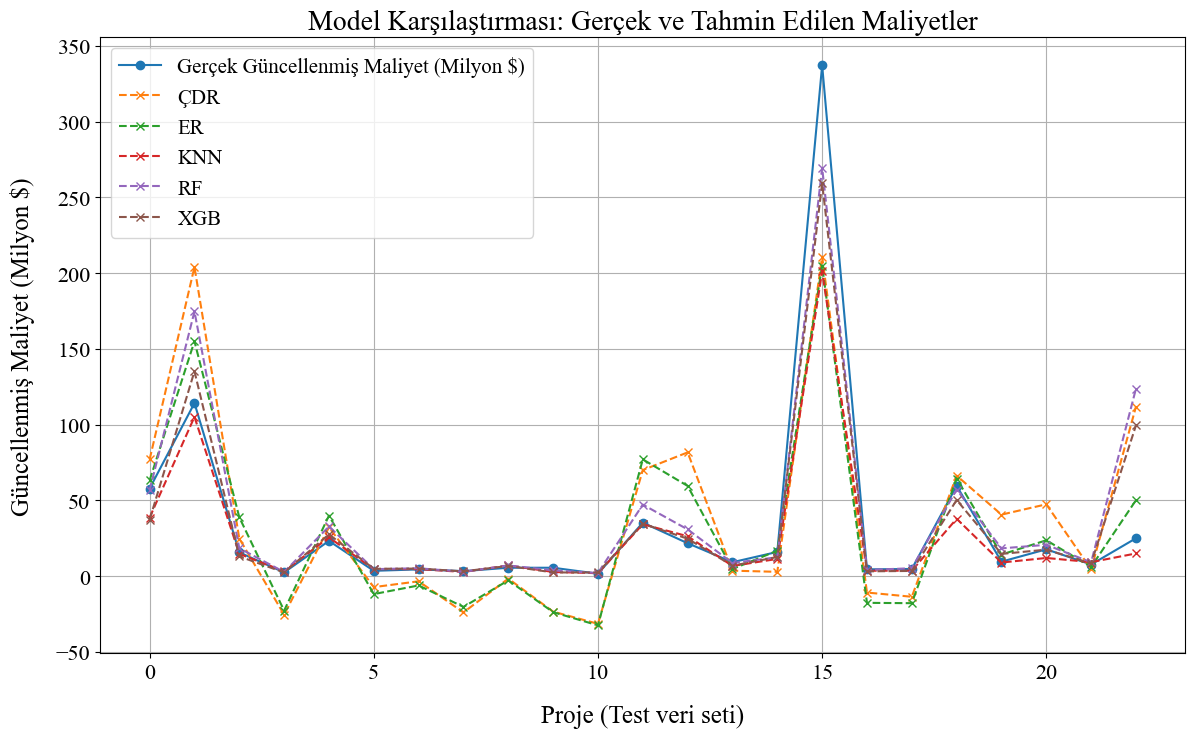

In [17]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Times New Roman fontunu ayarla
rcParams['font.family'] = 'Times New Roman'

# Gerçek maliyet ve her modelin tuning sonrası tahminlerini saklayın
models_predictions = {
    "Gerçek Güncellenmiş Maliyet": y_test.values / 1e6,
    "ÇDR": linear_regression.predict(X_test) / 1e6,  # Çoklu doğrusal regresyon
    "ER": best_elasticnet.predict(X_test) / 1e6,  # ElasticNet AT
    "KNN": best_knn.predict(X_test) / 1e6,  # KNN AT
    "RF": best_rf.predict(X_test) / 1e6,  # Random Forest AT
    "XGB": best_xgb.predict(X_test) / 1e6  # XGB AT
}

# Grafik boyutunu ve çizim ayarlarını yapın
plt.figure(figsize=(14, 8))

# Gerçek maliyetleri çiz
plt.plot(models_predictions["Gerçek Güncellenmiş Maliyet"], label="Gerçek Güncellenmiş Maliyet (Milyon $)", marker='o')

# Her modelin tahminlerini çiz
for model_name, predictions in models_predictions.items():
    if model_name != "Gerçek Güncellenmiş Maliyet":  # Gerçek değerler ayrı çizildi
        plt.plot(predictions, label=f"{model_name}", marker='x', linestyle='--')

# Grafik başlığı ve etiketler
plt.title("Model Karşılaştırması: Gerçek ve Tahmin Edilen Maliyetler", fontsize=20)
plt.xlabel("Proje (Test veri seti)", fontsize=18, labelpad=15)
plt.ylabel("Güncellenmiş Maliyet (Milyon $)", fontsize=18, labelpad=15)

# Grid ve legend ayarları
plt.legend(fontsize=15, loc='upper left')
plt.grid(True)

# X ve Y tick font ayarları
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# PNG olarak kaydetme
plt.savefig("tum_model_guncllenmis_maliyet_karsilastirma.png", format='png', dpi=1000, bbox_inches='tight')

# Grafik gösterimi
plt.show()

In [18]:
with open("G:\\Drive'ım\\AKADEMİK\\DOKTORA\\Doktora Tez Modeller\\ML Çalışmaları\\Tüm verilerle analizler\\Tüm_veri_wo_manipülasyon\\pipeline_project\\models\\random_forest_model.pkl", "wb") as file:
    pickle.dump(best_rf, file)

with open("G:\\Drive'ım\\AKADEMİK\\DOKTORA\\Doktora Tez Modeller\\ML Çalışmaları\\Tüm verilerle analizler\\Tüm_veri_wo_manipülasyon\\pipeline_project\\models\\xgboost_model.pkl", "wb") as file:
    pickle.dump(best_xgb, file)

with open("G:\\Drive'ım\\AKADEMİK\\DOKTORA\\Doktora Tez Modeller\\ML Çalışmaları\\Tüm verilerle analizler\\Tüm_veri_wo_manipülasyon\\pipeline_project\\models\\knn_model.pkl", "wb") as file:
    pickle.dump(best_knn, file)

print("Modeller başarıyla kaydedildi!")



Modeller başarıyla kaydedildi!


In [19]:
import pickle

# Random Forest modelini yükle
with open("random_forest_model.pkl", "rb") as file:
    rf_model = pickle.load(file)

# XGBoost modelini yükle
with open("xgboost_model.pkl", "rb") as file:
    xgb_model = pickle.load(file)

# KNN modelini yükle
with open("knn_model.pkl", "rb") as file:
    knn_model = pickle.load(file)

print("Modeller başarıyla yüklendi!")


FileNotFoundError: [Errno 2] No such file or directory: 'random_forest_model.pkl'

# Kullanıcıdan veri alma
diameter = float(input("Diameter (inç): "))
length = float(input("Length (km): "))
line_valve = int(input("Line Valve (adet): "))
take_off_valve = int(input("Take-off Valve (adet): "))
pigging_station = int(input("Pigging Station (adet): "))

# Kullanıcının seçtiği model
print("\nKullanılacak model:")
print("1. Random Forest")
print("2. XGBoost")
print("3. KNN")
model_choice = int(input("Model seçiminiz (1/2/3): "))

# Tahmin yap
input_data = pd.DataFrame(
    [[diameter, length, line_valve, take_off_valve, pigging_station]],
    columns=["diameter", "length", "line_valve", "take_off_valve", "pigging_station"])

if model_choice == 1:
    prediction = rf_model.predict(input_data)[0]
    model_name = "Random Forest"
elif model_choice == 2:
    prediction = xgb_model.predict(input_data)[0]
    model_name = "XGBoost"
elif model_choice == 3:
    prediction = knn_model.predict(input_data)[0]
    model_name = "KNN"
else:
    print("Geçersiz seçim!")
    prediction = None

# Sonuçları göster
if prediction is not None:
    print(f"\nSeçilen model: {model_name}")
    print(f"Tahmin edilen maliyet: {prediction:,.2f} USD")



import pandas as pd

# Kullanıcıdan veri alma
diameter = float(input("Diameter (inç): "))
length = float(input("Length (km): "))
line_valve = int(input("Line Valve (adet): "))
take_off_valve = int(input("Take-off Valve (adet): "))
pigging_station = int(input("Pigging Station (adet): "))

# Kullanıcıdan alınan veriyi bir DataFrame olarak düzenle
input_data = pd.DataFrame(
    [[diameter, length, line_valve, take_off_valve, pigging_station]],
    columns=["diameter", "length", "line_valve", "take_off_valve", "pigging_station"]
)

# Her model için tahmin yap
rf_prediction = rf_model.predict(input_data)[0]
xgb_prediction = xgb_model.predict(input_data)[0]
knn_prediction = knn_model.predict(input_data)[0]

# Hata aralıklarını hesaplama
rf_lower = rf_prediction * (1 - rf_mape / 100)
rf_upper = rf_prediction * (1 + rf_mape / 100)

xgb_lower = xgb_prediction * (1 - xgb_mape / 100)
xgb_upper = xgb_prediction * (1 + xgb_mape / 100)

knn_lower = knn_prediction * (1 - knn_mape / 100)
knn_upper = knn_prediction * (1 + knn_mape / 100)

# Sonuçları göster
# Sonuçları göster
print("\n--- Tahmin Sonuçları ---")
print(f"Random Forest Tahmini: {rf_prediction:,.2f} USD ± %{rf_mape:.2f} ({rf_lower:,.2f} - {rf_upper:,.2f})")
print(f"XGBoost Tahmini: {xgb_prediction:,.2f} USD ± %{xgb_mape:.2f} ({xgb_lower:,.2f} - {xgb_upper:,.2f})")
print(f"KNN Tahmini: {knn_prediction:,.2f} USD ± %{knn_mape:.2f} ({knn_lower:,.2f} - {knn_upper:,.2f})")

# Kullanıcıya bilgi notu
print("\nNot: Bu tahminler geçmiş verilere dayalı olarak yapılmıştır ve hata payları MAPE değerlerine göre hesaplanmıştır.")
print("Proje maliyetleri, farklı koşullara bağlı olarak değişiklik gösterebilir. Lütfen bu sonuçları referans olarak değerlendirin.")



In [ ]:
import sklearn, xgboost, numpy
print("scikit-learn:", sklearn.__version__)
print("xgboost:", xgboost.__version__)
print("numpy:", numpy.__version__)


In [ ]:
import pickle

# mape_values.pkl dosyasını kontrol et
with open('models/mape_values.pkl', 'rb') as f:
    mape_values = pickle.load(f)

print(mape_values)
